<a href="https://colab.research.google.com/github/Om1323/CarbonScope/blob/main/CarbonScope_A_Machine_Learning_Pipeline_for_Carbon_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


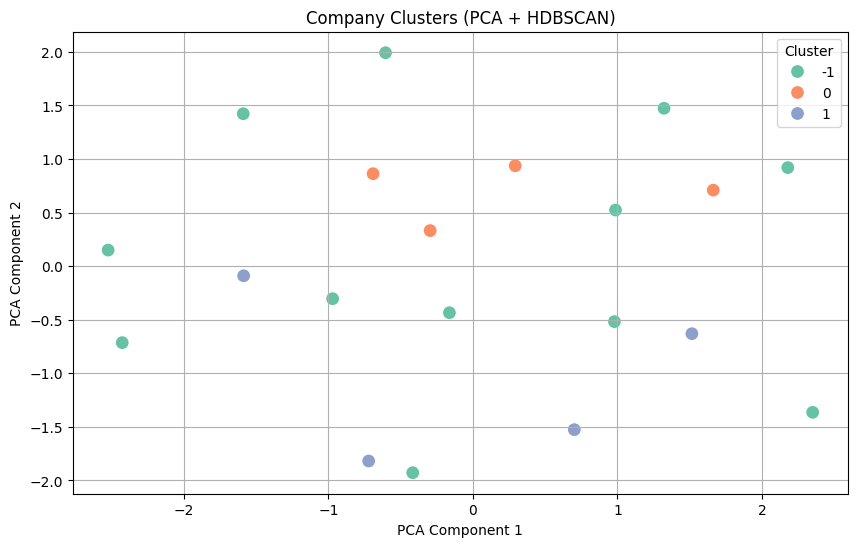

,Company_Name,Sector,Employees,Annual_Revenue_M,CO2_Emissions_Tons,Green_Certified,Regions_Operated,Sustainability_Score,Cluster
0,Company_1,Energy,3284,108.61,327.07,0,9,7.84,-1
1,Company_2,Transport,3925,423.99,202.73,0,5,3.51,1
2,Company_3,Manufacturing,3374,58.68,325.44,0,9,2.65,-1
3,Company_4,Energy,3565,270.47,835.34,1,4,1.99,-1
4,Company_5,Transport,808,390.76,824.98,1,6,7.59,-1


In [ ]:
# Install necessary package
!pip install hdbscan

# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (after uploading in Colab file panel)
df = pd.read_csv("company_features.csv")

# Drop non-numeric columns
X = df.drop(columns=["Company_Name", "Sector"])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# HDBSCAN Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
df['Cluster'] = clusterer.fit_predict(X_pca)

# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title("Company Clusters (PCA + HDBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Show the final DataFrame
df.head()

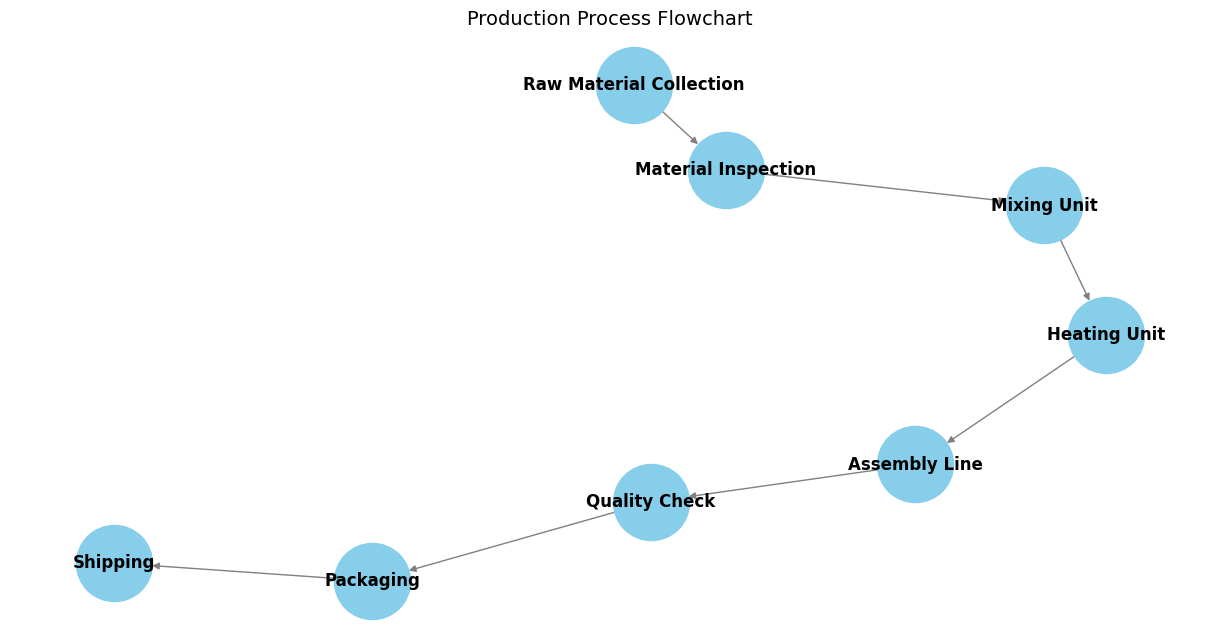

In [ ]:
# Install if not already available
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt

# Define the production process
G = nx.DiGraph()

# Add edges (process flow: from → to)
G.add_edges_from([
    ("Raw Material Collection", "Material Inspection"),
    ("Material Inspection", "Mixing Unit"),
    ("Mixing Unit", "Heating Unit"),
    ("Heating Unit", "Assembly Line"),
    ("Assembly Line", "Quality Check"),
    ("Quality Check", "Packaging"),
    ("Packaging", "Shipping")
])

# Draw the network graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", edge_color='gray', arrows=True)
plt.title("Production Process Flowchart", fontsize=14)
plt.show()

## Scientific Literature Summary

1. **Estimating Carbon Footprints with Deep Learning**  
   *Smith et al., 2020*  
   Used convolutional neural networks to analyze satellite imagery for identifying high-emission zones across manufacturing plants.

2. **Supply Chain Optimization for Decarbonization**  
   *Zhang & Lin, 2021*  
   Applied unsupervised clustering to group suppliers by emission categories using company-reported and satellite-derived data.

3. **Imputation Techniques in Environmental Data**  
   *Rahul et al., 2019*  
   Compared KNN and Bayesian methods for filling missing CO2 emission entries in trade and logistics datasets.